# 5.2 Training challenges
## 5.2.6 Wasserstein GAN
- 参考：論文[2017]Wasserstein GANの8ページ：https://arxiv.org/pdf/1701.07875.pdf
- WGANのアルゴリズム

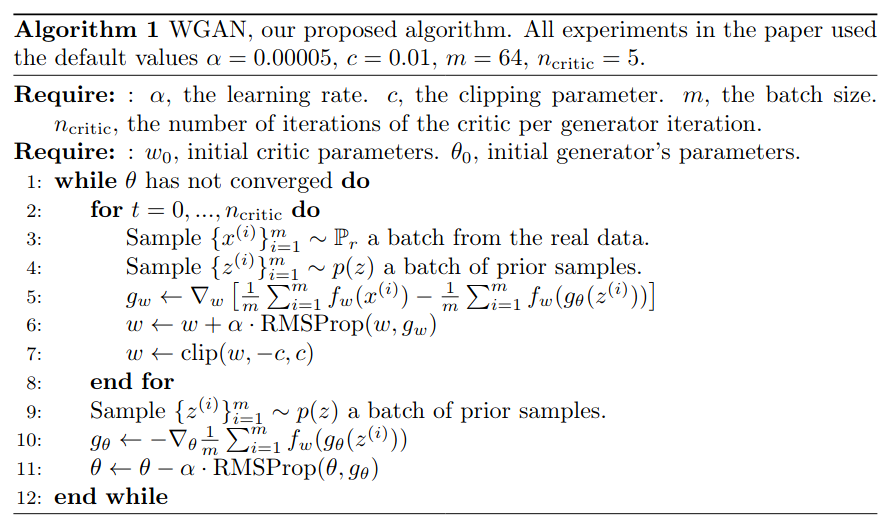

In [3]:
from IPython.display import Image
Image("img/wgan-algorithm-2020-02-23 00-08-22.png")

- WGANはearth mover's distanceをloss functionとして使っている。
- WGANのDiscriminatorのloss function
 - $\max \mathbb{E}_{x\sim \mathbb{P}_r}[f_w(x)]-\mathbb{E}_{z\sim p(z)}[f_w(g_\theta(z))]$
- WGANのGeneratorのloss function
 - $\min \mathbb{E}_{x\sim \mathbb{P}_r}[f_w(x)]-\mathbb{E}_{z\sim p(z)}[f_w(g_\theta(z))]$
- $f_w$はDiscriminator。
- $w$はDiscriminatorのパラメータ。
- $\theta$はGeneratorのパラメータ。
 - だからGeneratorのloss functionは以下と等価。
 - $\min -\mathbb{E}_{z\sim p(z)}[f_w(g_\theta(z))]$

### WGANの強み
- clearer stopping criteria.
 - correlation between the Discriminator loss and the perceptual quality.
- earth mover's distance, or Wasserstein distanceが、KL divergenceやJS divergenceより優れている。
- min-maxやnon-saturating GANと比べて：
 - min-maxはmore explainable but doesn't work as well in practice.
 - non-saturatingバージョンはloses a lot of the mathematical guarantees but works much better.
 - Wassersteinバージョンはhas both theoretical grounding and largely superior performance.

### WGANのポジション
- WGAN (or the gradient penalty version, WGAN-GP) is widely used and has become the **de facto standard** in much of GAN research and practice.
 - NS-GANのポジションはtypically not used in practice anymore.
- WGANのバリエーションWGAN-GP(gradient penalties)は、is commonly used in new academic papers.

### 復習：NS-GANのloss function
- $J^D=E[log(D(x))]+E[log(1-D(G(z)))]$
- $J^G=E[log(D(G(z)))]$
- NS-GANが理論上に弱い原因：$J^G!=-J^D$
 - min-max GANやWGANは全部$J^G==-J^D$.こういう意味だと、WGANも実はmin-maxです。
 - $J^G==-J^D$条件があると、Nash Equilibrium（ナッシュ均衡）の理論保証ができる。

### min-max式でGAN(MM-GAN)やWGANを表す
- 参考：[2017]Improved Training of Wasserstein GANsの2 Background. https://arxiv.org/pdf/1704.00028.pdf
- Generative adversarial networks
 - $\min_{G}\max_{D} \mathbb{E}_{x\sim \mathbb{P}_r}[\log(D(x))]+\mathbb{E}_{\tilde{x}\sim \mathbb{P}_g}[\log(1-D(\tilde{x}))]$
- Wasserstein GANs.
 - $\min_{G}\max_{D} \mathbb{E}_{x\sim \mathbb{P}_r}[D(x)]-\mathbb{E}_{\tilde{x}\sim \mathbb{P}_g}[D(\tilde{x}))]$

### WGAN-GP(gradient penalties)のアルゴリズム
- 参考：[2017]Improved Training of Wasserstein GANsの4ページ目. https://arxiv.org/pdf/1704.00028.pdf
- WGANアルゴリズムと比べると
 - Discriminatorのloss functionにgradient penaltyを追加。
 - OptimizerはRMSPropからAdamに変換。
 - Discriminatorパラメータのclippingがなくなった。

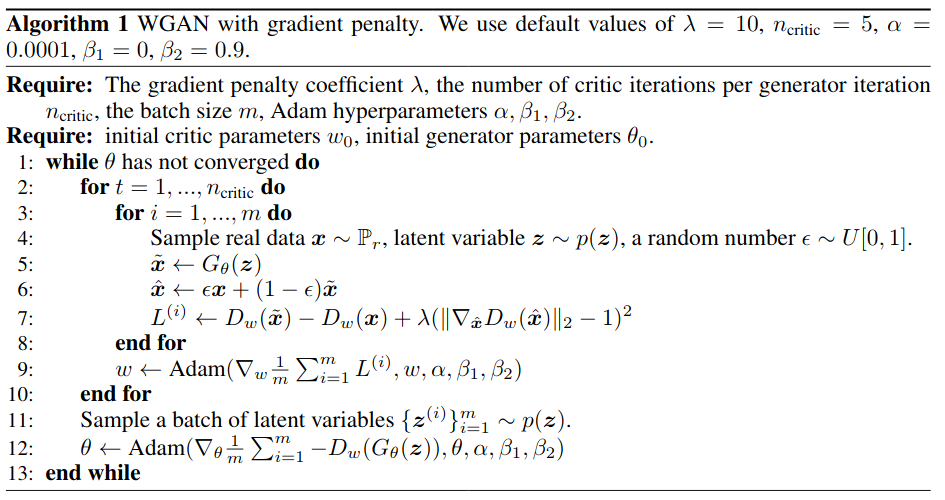

In [4]:
Image("img/wgan-gp-2020-02-23 13-22-04.png")

# 5.4 Training hacks
- Normalizations of inputs (standard in machine learning).
- Gradient penalties.
- Train the Discriminator more (Pretraining the Discriminator, Having more updates for the Discriminator per training cycle).
- Soft and noisy labels (rather than the typical binary classification).

## 5.4.2 Batch Normalization
- 悪口：Recently batch norm has been shown to sometimes deliver bad results, especially in the Generator.
- 上記のImproved Training of Wasserstein GANs論文から出た。

## 5.4.5 Avoid sparse gradients
- sparse gradientはつまりgradientベクターに0が多い。つまり情報の紛失が多い。
- Discriminatorの学習はまだ大丈夫ですが、Generatorの学習にとってきつい。Generatorがこれらの情報をrecoverしないといけないかもしれないからだ。
- ReLUじゃなく、Leaky ReLUを利用。
 - 原因はReLUを使うと、negative情報が全部なくなる。しかし、we might have to recover it later!
- MaxPoolじゃなく、average poolingを利用。
 - MaxPool makes it much harder to use the transposed convolutions to recover the information.
 - average poolingも情報を紛失するが、average is more representative than the simple maximum.
 - MaxPoolの場合、maximum valueに対するgradientは1、他のvaluesに対するgradientは全部0（maximum以外のvalueを変えても影響ないから）。average poolingの場合は、みんなのgradientは一緒($\frac{1}{N}$)だ。https://datascience.stackexchange.com/questions/11699/backprop-through-max-pooling-layers
